In [4]:
import pandas as pd # Data processing 
import numpy as np 
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualisation
import missingno as msno # Missing Data - Data visualisation
from collections import Counter #Counting

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [5]:
pip install --upgrade seaborn

In [6]:
pip install --upgrade shap

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Loading the data into the notebook
np.random.seed(42)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Loading the data into a pandas dataframe
cancer_df = pd.DataFrame(cancer['data'], columns= cancer['feature_names'])
cancer_df['target'] = cancer['target']
cancer_temp = cancer_df.sample(frac=1)

In [8]:
# Overview of the data
cancer_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
# Basic info of the data
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
# Checking for duplicated records/values in the dataframe
cancer_df.duplicated().sum()

0

In [12]:
# Checking for null values 
cancer_df.isnull().sum() # No null values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [13]:
# Group by diagnosis
cancer_df.target.unique()

array([0, 1])

In [14]:
# Group by diagnosis

target = cancer_df.groupby('target', axis=0)
pd.DataFrame(target.size(), columns=['No of Observations'])

,No of Observations
target,
0,212
1,357


In [15]:
target_count = cancer_df["target"].value_counts()
target_count

target
1    357
0    212
Name: count, dtype: int64

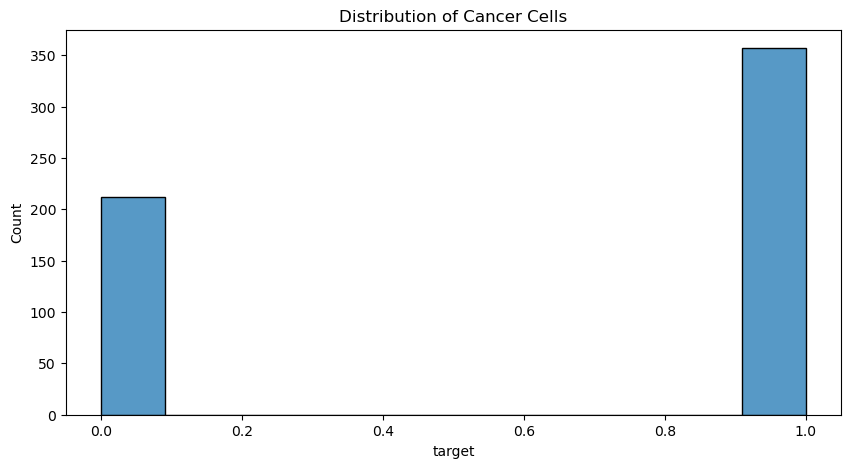

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(data = cancer_df["target"])
plt.title("Distribution of Cancer Cells");
plt.show();

In [17]:
# Correlation between the feature labels and target variable
corr_matrix = cancer_df.corr()
corr_matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<Figure size 1000x800 with 0 Axes>

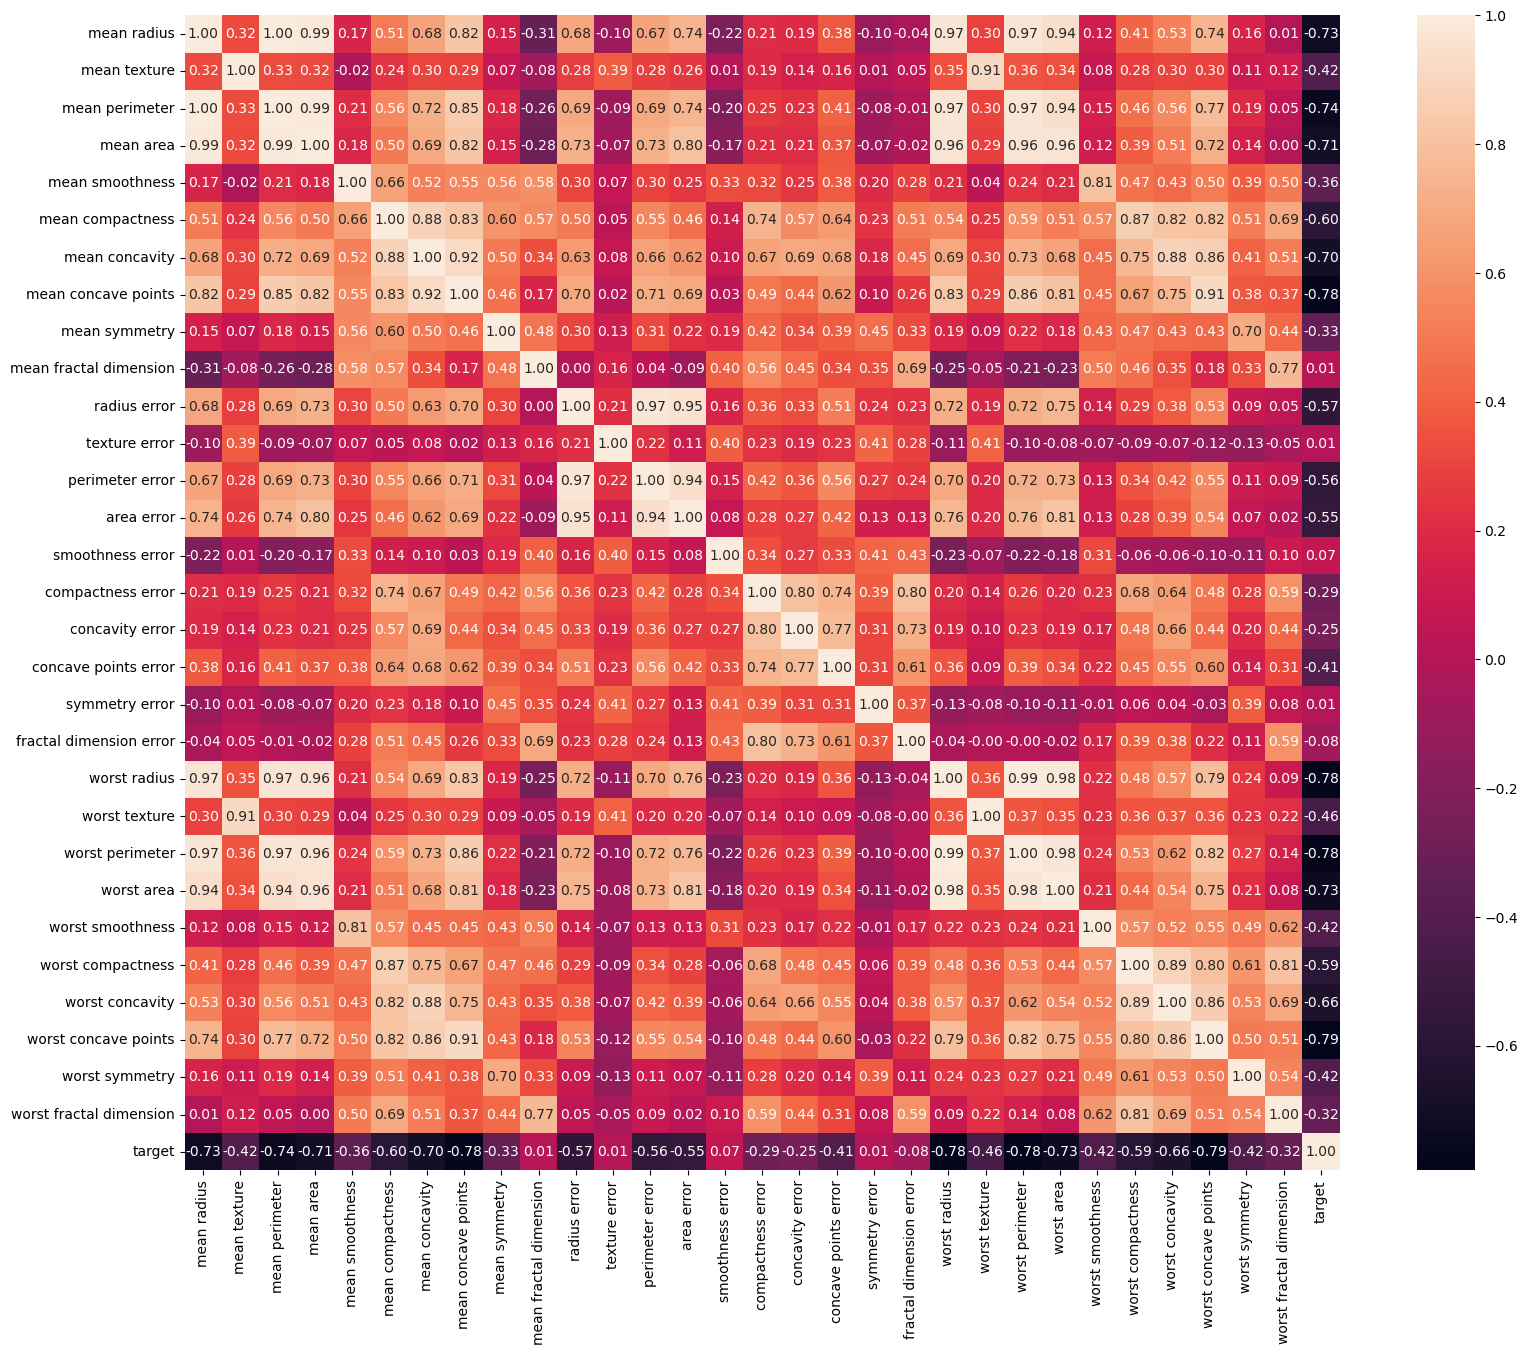

In [18]:
plt.figure(figsize=(10,8))
fig, ax = plt.subplots(figsize=(20,15))
hm=sns.heatmap(cancer_df.corr(),cbar=True, square=True, fmt='.2f', annot=True)

### Observation

•	A correlation matrix was generated to evaluate the interrelationships among the quantitative variables in the breast cancer dataset. The coefficients ranged from −1.00 to +1.00, where values approaching +1.00 indicate strong positive relationships, values approaching −1.00 indicate strong negative relationships, and values near 0.00 suggest weak or no linear association. The heatmap visualization revealed distinct clusters of highly correlated features, moderate associations, and a limited number of negative correlations.

•	The correlation heatmap reveals strong relationships among several features of the breast cancer dataset. Variables such as mean radius, mean perimeter, mean area, and mean concavity show very high positive correlations. Similarly, worst radius, worst perimeter, and worst area are almost perfectly correlated.

•	Moderate correlations were observed among texture-related variables such as mean texture, compactness, and smoothness, Weak correlations, on the other hand, were primarily seen in symmetry and fractal dimension.

•	Variables that were strongly associated with the target class (malignant or benign) included mean radius, mean perimeter, mean area, and concavity-related features, all showing positive relationships with malignancy. Conversely, smoothness and symmetry showed negative correlations

•	Overall, the heatmap highlights redundancy among several features, emphasizing the need for dimensionality reduction or feature selection


#### Data Preprocessing and Feature Engineering 

In [19]:
cancer_df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [20]:
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [21]:
### Features and Label

# x = Features
# y = Label

In [22]:
x = cancer_df.drop(["target"],axis=1) 
y = cancer_df[['target']]

In [23]:
x.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [24]:
y.head(2)

,target
0,0
1,0


#### Data Splitting

In [25]:
print(f"Data contained {len(x)} records before splitting")

Data contained 569 records before splitting


In [26]:
# Splitting Data into Training and Test sets 

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
ytrain.head(2)

,target
68,1
181,0


In [28]:
xtrain.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


In [29]:
xtest.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


In [30]:
len(xtest) == len(ytest)

True

In [31]:
len(xtrain) + len(xtest) == len(x)

True

### Model Training

#### Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

# Initialize Scaler
scaler = MinMaxScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.fit_transform(xtest)

In [33]:
# Check if scaling is successful the minimum and maximum values for each feature
print("Minimum values per feature:\n", xtrain_scaled.min(axis=0))
print("Maximum values per feature:\n", xtrain_scaled.max(axis=0))

Minimum values per feature:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum values per feature:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


#### Initialize and train models

In [34]:
# Initialize and train models

Classifiers = [[SGDClassifier(random_state = 42), 'sdg_model'], 
               [DecisionTreeClassifier(random_state = 42), 'dt_model'], 
               [LogisticRegression(random_state = 42),'lr_model'], 
               [RandomForestClassifier(random_state = 42), 'rf_model'],
               [XGBClassifier(random_state = 42), 'xgb_model'],
               [SVC(random_state =42), 'svc_model']
              ]

In [35]:
Classifiers

[[SGDClassifier(random_state=42), 'sdg_model'],
 [DecisionTreeClassifier(random_state=42), 'dt_model'],
 [LogisticRegression(random_state=42), 'lr_model'],
 [RandomForestClassifier(random_state=42), 'rf_model'],
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, ...),
  'x

<---sdg_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.74138   1.00000   0.85149        43
           1    1.00000   0.78873   0.88189        71

    accuracy                        0.86842       114
   macro avg    0.87069   0.89437   0.86669       114
weighted avg    0.90245   0.86842   0.87042       114

Confusion Matrix: 
 [[43  0]
 [15 56]]
Accuracy scores: [0.85714286 0.86813187 0.84615385 0.71428571 0.74725275]
Mean accuracy: 80.66%

Precision scores: [1.         0.86885246 1.         1.         0.7125    ]
Mean precision: 91.63%

Recall scores: [0.77586207 0.92982456 0.75438596 0.54385965 1.        ]
Mean recall: 80.08%

F1 scores: [0.87378641 0.89830508 0.86       0.70454545 0.83211679]
Mean f1: 83.38%


Cross-Validation F1 Scores: [0.87378641 0.89830508 0.86       0.70454545 0.83211679]
Mean CV Score - Scaled Model Training: 83.38%
--------------------------------------------------


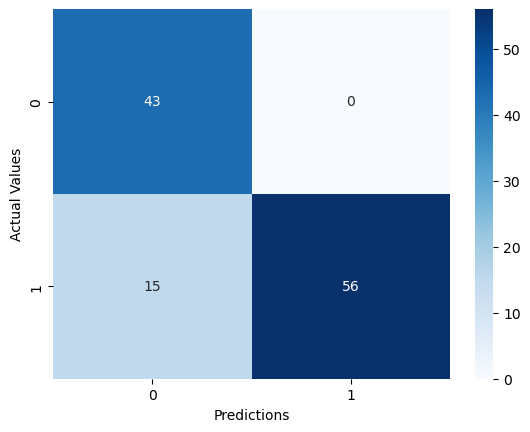

--------------------------------------------------
<---dt_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.82051   0.74419   0.78049        43
           1    0.85333   0.90141   0.87671        71

    accuracy                        0.84211       114
   macro avg    0.83692   0.82280   0.82860       114
weighted avg    0.84095   0.84211   0.84042       114

Confusion Matrix: 
 [[32 11]
 [ 7 64]]
Accuracy scores: [0.92307692 0.89010989 0.93406593 0.9010989  0.93406593]
Mean accuracy: 91.65%

Precision scores: [0.96363636 0.8852459  1.         0.94444444 0.91803279]
Mean precision: 94.23%

Recall scores: [0.9137931  0.94736842 0.89473684 0.89473684 0.98245614]
Mean recall: 92.66%

F1 scores: [0.9380531  0.91525424 0.94444444 0.91891892 0.94915254]
Mean f1: 93.32%


Cross-Validation F1 Scores: [0.9380531  0.91525424 0.94444444 0.91891892 0.94915254]
Mean CV Score - Scaled Model Training: 93.32%
-----------------------------------

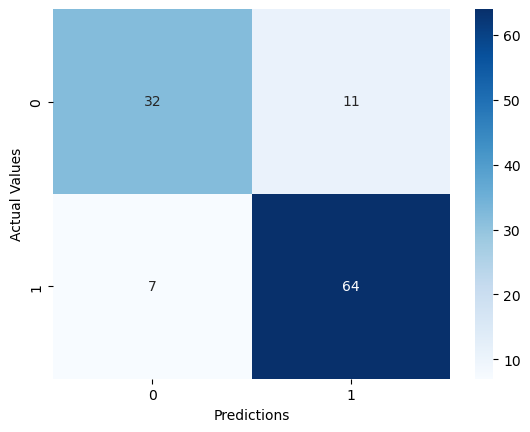

--------------------------------------------------
<---lr_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.89362   0.97674   0.93333        43
           1    0.98507   0.92958   0.95652        71

    accuracy                        0.94737       114
   macro avg    0.93935   0.95316   0.94493       114
weighted avg    0.95058   0.94737   0.94778       114

Confusion Matrix: 
 [[42  1]
 [ 5 66]]
Accuracy scores: [0.97802198 0.9010989  0.96703297 0.95604396 0.9010989 ]
Mean accuracy: 94.07%

Precision scores: [0.98275862 0.9137931  0.96551724 0.93442623 0.9137931 ]
Mean precision: 94.21%

Recall scores: [0.98275862 0.92982456 0.98245614 1.         0.92982456]
Mean recall: 96.50%

F1 scores: [0.98275862 0.92173913 0.97391304 0.96610169 0.92173913]
Mean f1: 95.33%


Cross-Validation F1 Scores: [0.98275862 0.92173913 0.97391304 0.96610169 0.92173913]
Mean CV Score - Scaled Model Training: 95.33%
-----------------------------------

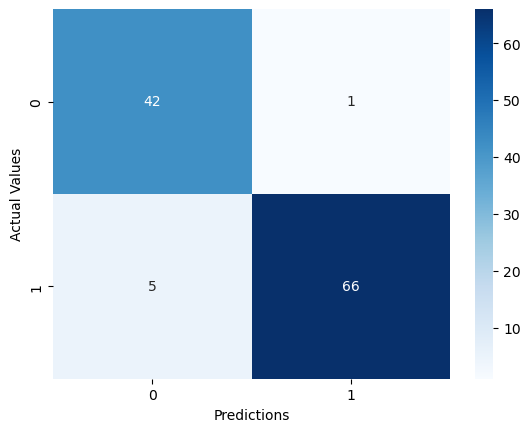

--------------------------------------------------
<---rf_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.84314   1.00000   0.91489        43
           1    1.00000   0.88732   0.94030        71

    accuracy                        0.92982       114
   macro avg    0.92157   0.94366   0.92760       114
weighted avg    0.94083   0.92982   0.93072       114

Confusion Matrix: 
 [[43  0]
 [ 8 63]]
Accuracy scores: [0.97802198 0.94505495 0.97802198 0.95604396 0.93406593]
Mean accuracy: 95.82%

Precision scores: [0.96666667 0.93333333 1.         0.96491228 0.93220339]
Mean precision: 95.94%

Recall scores: [1.         0.98245614 0.96491228 0.96491228 0.96491228]
Mean recall: 97.54%

F1 scores: [0.98305085 0.95726496 0.98214286 0.96491228 0.94827586]
Mean f1: 96.71%


Cross-Validation F1 Scores: [0.98305085 0.95726496 0.98214286 0.96491228 0.94827586]
Mean CV Score - Scaled Model Training: 96.71%
-----------------------------------

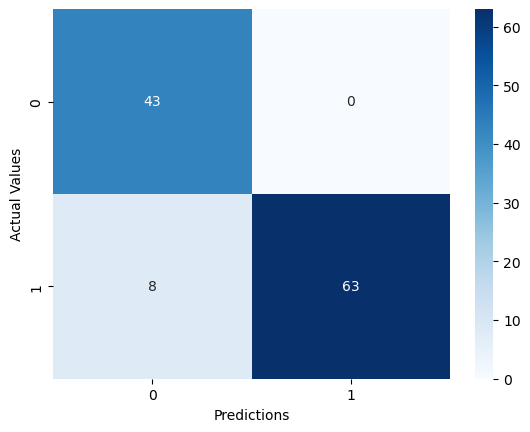

--------------------------------------------------
<---xgb_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.79630   1.00000   0.88660        43
           1    1.00000   0.84507   0.91603        71

    accuracy                        0.90351       114
   macro avg    0.89815   0.92254   0.90131       114
weighted avg    0.92316   0.90351   0.90493       114

Confusion Matrix: 
 [[43  0]
 [11 60]]
Accuracy scores: [0.95604396 0.96703297 0.98901099 0.96703297 0.94505495]
Mean accuracy: 96.48%

Precision scores: [0.96551724 0.96551724 1.         0.96551724 0.93333333]
Mean precision: 96.60%

Recall scores: [0.96551724 0.98245614 0.98245614 0.98245614 0.98245614]
Mean recall: 97.91%

F1 scores: [0.96551724 0.97391304 0.99115044 0.97391304 0.95726496]
Mean f1: 97.24%


Cross-Validation F1 Scores: [0.96551724 0.97391304 0.99115044 0.97391304 0.95726496]
Mean CV Score - Scaled Model Training: 97.24%
----------------------------------

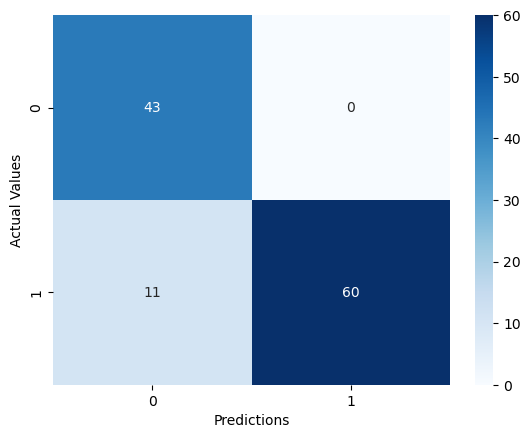

--------------------------------------------------
<---svc_model--->
Classification Report: 
               precision    recall  f1-score   support

           0    0.84000   0.97674   0.90323        43
           1    0.98438   0.88732   0.93333        71

    accuracy                        0.92105       114
   macro avg    0.91219   0.93203   0.91828       114
weighted avg    0.92992   0.92105   0.92198       114

Confusion Matrix: 
 [[42  1]
 [ 8 63]]
Accuracy scores: [0.92307692 0.87912088 0.96703297 0.86813187 0.87912088]
Mean accuracy: 90.33%

Precision scores: [0.9047619  0.84848485 0.96551724 0.84615385 0.84848485]
Mean precision: 88.27%

Recall scores: [0.98275862 0.98245614 0.98245614 0.96491228 0.98245614]
Mean recall: 97.90%

F1 scores: [0.94214876 0.91056911 0.97391304 0.90163934 0.91056911]
Mean f1: 92.78%


Cross-Validation F1 Scores: [0.94214876 0.91056911 0.97391304 0.90163934 0.91056911]
Mean CV Score - Scaled Model Training: 92.78%
----------------------------------

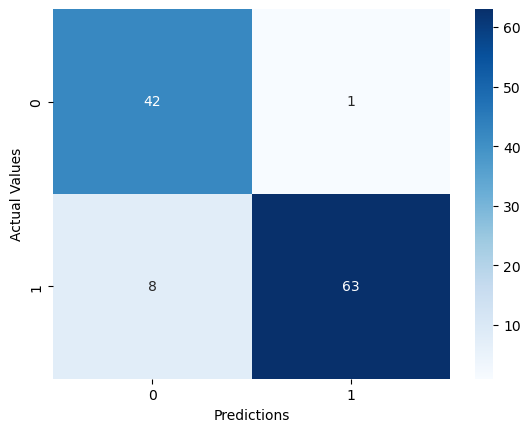

--------------------------------------------------


In [36]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate

for Classifier in Classifiers:
    model = Classifier[0]
    model_name = Classifier[1]
    print(f"<---{model_name}--->")
    
    # Fit model
    model.fit(xtrain_scaled, ytrain)
    model_pred = model.predict(xtest_scaled)

    # Classification report & confusion matrix
    report = classification_report(ytest, model_pred, digits=5)
    matrix = confusion_matrix(ytest, model_pred)

    print("Classification Report: \n", report)
    print("Confusion Matrix: \n", matrix)

    # multiple metrics
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    cv_results = cross_validate(model, xtrain, ytrain, cv=5, scoring=scoring)

    for metric in scoring:
        scores = cv_results[f'test_{metric}']
        print(f"{metric.capitalize()} scores: {scores}")
        print(f"Mean {metric}: {scores.mean()*100:.2f}%\n")

     # Cross-Validate Models
    cv_scores = cross_val_score(model, xtrain, ytrain, scoring = 'f1', cv = 5)
    mean_cv_score_percentage = cv_scores.mean() * 100
    print(f'\nCross-Validation F1 Scores: {cv_scores}')
    print(f'Mean CV Score - Scaled Model Training: {mean_cv_score_percentage:.2f}%')
    print("-" * 50)

    # Heatmap
    sns.heatmap(matrix, annot=True, fmt='g', cmap="Blues")
    plt.xlabel("Predictions")
    plt.ylabel("Actual Values")
    plt.show()
    print("-" * 50)

#### Observation
##### The model XGBClassifier had the best performance with the highest mean accuracy (96.48%), precision (96.60%), recall (97.91%) and F1-score (97.24%). The model identifies nearly all the actual cancer cells making a few errors. 

#### Hyperparameter tunning of the models

##### SGD Classifier

In [38]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
Classifiers

[[SGDClassifier(random_state=42), 'sdg_model'],
 [DecisionTreeClassifier(random_state=42), 'dt_model'],
 [LogisticRegression(random_state=42), 'lr_model'],
 [RandomForestClassifier(random_state=42), 'rf_model'],
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, ...),
  'x

In [41]:
Classifiers[0][0]

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [42]:
SGDClassifier()

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [43]:
sdg_model = SGDClassifier(random_state=42)

In [44]:
parameter_grids = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'max_iter': [1000, 2000, 3000, 4000, 5000],  
    'alpha': np.logspace(-5, 0, 6),              
    'learning_rate': ['optimal', 'adaptive', 'constant'],
    'penalty': ['l2', 'l1', 'elasticnet']        
}

In [45]:
# Initializing Grid Search

sdg_gs = GridSearchCV(estimator= sdg_model, param_grid = parameter_grids, cv=5, n_jobs =-1, verbose= 2, scoring= 'f1')

In [46]:
sdg_gs.fit(xtrain_scaled, ytrain)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


,estimator,SGDClassifier(random_state=42)
,param_grid,"{'alpha': array([1.e-05...e-01, 1.e+00]), 'learning_rate': ['optimal', 'adaptive', ...], 'loss': ['hinge', 'log_loss', ...], 'max_iter': [1000, 2000, ...], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [47]:
print('Best Parameters:', sdg_gs.best_params_)

Best Parameters: {'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'log_loss', 'max_iter': 1000, 'penalty': 'l1'}


In [48]:
print("Best cross-val score:", sdg_gs.best_score_)

Best cross-val score: 0.980775629884173


In [49]:
print("Test Set Score:", sdg_gs.score(xtest_scaled, ytest))

Test Set Score: 0.9640287769784173


In [50]:
best_sdg_model = sdg_gs.best_estimator_

##### Model Evaluation after hyper parameter tuning

Classification Report: 
               precision    recall  f1-score   support

           0    0.91304   0.97674   0.94382        43
           1    0.98529   0.94366   0.96403        71

    accuracy                        0.95614       114
   macro avg    0.94917   0.96020   0.95392       114
weighted avg    0.95804   0.95614   0.95641       114

Confusion Matrix: 
 [[42  1]
 [ 4 67]]
Accuracy scores: [0.98901099 0.95604396 1.         0.98901099 0.94505495]
Mean accuracy: 97.58%

Precision scores: [1.         0.94915254 1.         0.98275862 0.96428571]
Mean precision: 97.92%

Recall scores: [0.98275862 0.98245614 1.         1.         0.94736842]
Mean recall: 98.25%

F1 scores: [0.99130435 0.96551724 1.         0.99130435 0.95575221]
Mean f1: 98.08%


Cross-Validation Scores: [0.99130435 0.96551724 1.         0.99130435 0.95575221]
Mean CV Score - sdg Model: 98.08%
--------------------------------------------------


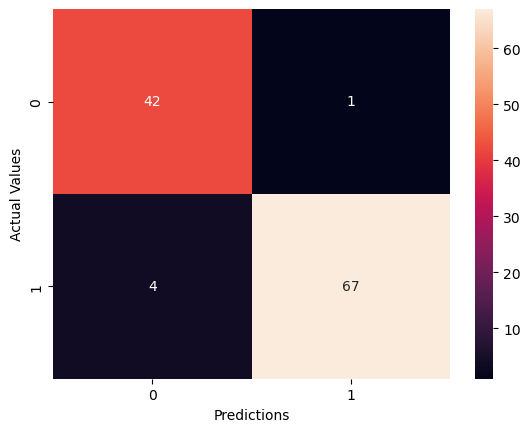

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate

# Predict
sdg_pred = best_sdg_model.predict(xtest_scaled)

# Classification report & confusion matrix
report = classification_report(ytest, sdg_pred, digits=5)
matrix = confusion_matrix(ytest, sdg_pred)

print("Classification Report: \n", report)
print("Confusion Matrix: \n", matrix)

# multiple metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(best_sdg_model, xtrain_scaled, ytrain, cv=5, scoring=scoring)

for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()} scores: {scores}")
    print(f"Mean {metric}: {scores.mean()*100:.2f}%\n")

# Cross-Validate Models
cv_scores = cross_val_score(best_sdg_model, xtrain_scaled, ytrain, scoring = 'f1', cv = 5)
mean_cv_score_percentage = cv_scores.mean() * 100
print(f'\nCross-Validation Scores: {cv_scores}')
print(f'Mean CV Score - sdg Model: {mean_cv_score_percentage:.2f}%')
print("-" * 50)

# Heatmap
sns.heatmap(matrix, annot = True, fmt = 'g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.show()

#### Decision Tree Classifier

In [52]:
Classifiers[1][0]

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [53]:
DecisionTreeClassifier()

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [54]:
dt_model = DecisionTreeClassifier(random_state=42)

In [55]:
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],   
    'max_depth': [None, 5, 10, 20, 30],             
    'min_samples_split': [2, 5, 10],                
    'min_samples_leaf': [1, 2, 4, 6],               
    'max_features': [None, 'sqrt', 'log2']          
}

In [56]:
# Initializing Grid Search

dt_gs = GridSearchCV(estimator= dt_model, param_grid = param_grid_dt, cv=5, n_jobs =-1, verbose=2, scoring= 'f1')

In [57]:
dt_gs.fit(xtrain_scaled, ytrain)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [None, 5, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [58]:
print('Best Parameters:', dt_gs.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [59]:
print("Best cross-val score:", dt_gs.best_score_)

Best cross-val score: 0.9579742850582431


In [60]:
print("Test Set Score:", dt_gs.score(xtest_scaled, ytest))

Test Set Score: 0.9007633587786259


In [61]:
best_dt_model = dt_gs.best_estimator_

#### Model Evaluation after Hyper Parameter tuning

Classification Report: 
               precision    recall  f1-score   support

           0    0.77778   0.97674   0.86598        43
           1    0.98333   0.83099   0.90076        71

    accuracy                        0.88596       114
   macro avg    0.88056   0.90387   0.88337       114
weighted avg    0.90580   0.88596   0.88764       114

Confusion Matrix: 
 [[42  1]
 [12 59]]
Accuracy scores: [0.97802198 0.9010989  0.97802198 0.94505495 0.93406593]
Mean accuracy: 94.73%

Precision scores: [0.98275862 0.9137931  1.         0.98148148 0.93220339]
Mean precision: 96.20%

Recall scores: [0.98275862 0.92982456 0.96491228 0.92982456 0.96491228]
Mean recall: 95.44%

F1 scores: [0.98275862 0.92173913 0.98214286 0.95495495 0.94827586]
Mean f1: 95.80%


Cross-Validation Scores: [0.98275862 0.92173913 0.98214286 0.95495495 0.94827586]
Mean CV Score -  dt Model: 95.80%
--------------------------------------------------


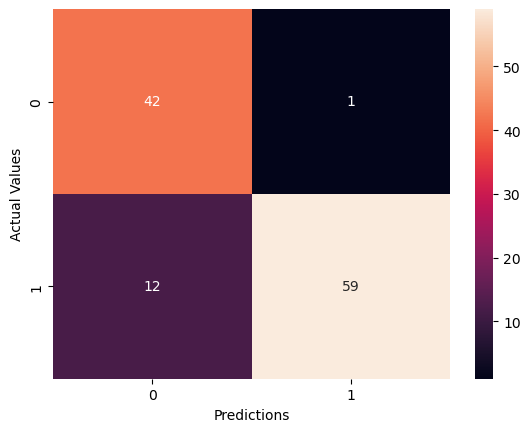

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
dt_pred = best_dt_model.predict(xtest_scaled)

# Classification report & confusion matrix
report = classification_report(ytest, dt_pred, digits=5)
matrix = confusion_matrix(ytest, dt_pred)

print("Classification Report: \n", report)
print("Confusion Matrix: \n", matrix)

# multiple metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(best_dt_model, xtrain_scaled, ytrain, cv=5, scoring=scoring)

for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()} scores: {scores}")
    print(f"Mean {metric}: {scores.mean()*100:.2f}%\n")

# Cross-Validate Models
cv_scores = cross_val_score(best_dt_model, xtrain_scaled, ytrain, scoring = 'f1', cv = 5)
mean_cv_score_percentage = cv_scores.mean() * 100
print(f'\nCross-Validation Scores: {cv_scores}')
print(f'Mean CV Score -  dt Model: {mean_cv_score_percentage:.2f}%')
print("-" * 50)

sns.heatmap(matrix, annot = True, fmt = 'g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.show()

#### Logistic Regression

In [63]:
Classifiers[2][0]

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [64]:
LogisticRegression()

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [65]:
lr_model = LogisticRegression(random_state=42)

In [66]:
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', None],   
    'C': [0.01, 0.1, 1, 10, 100],                  
    'solver': ['lbfgs', 'liblinear', 'saga'],      
    'max_iter': [100, 500, 1000]                   
}

In [67]:
lr_gs = GridSearchCV(estimator= lr_model, param_grid = param_grid_lr, cv=5, n_jobs =-1, verbose= 2, scoring='f1')

In [68]:
lr_gs.fit(xtrain_scaled, ytrain)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.01, 0.1, ...], 'max_iter': [100, 500, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [69]:
print('Best Parameters:', lr_gs.best_params_)

Best Parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}


In [70]:
print("Best cross-val score:", lr_gs.best_score_)

Best cross-val score: 0.9826686656671665


In [71]:
print("Test Set Score:", lr_gs.score(xtest_scaled, ytest))

Test Set Score: 0.8548387096774194


In [72]:
best_lr_model = lr_gs.best_estimator_

#### Model Evaluation after hyper parameter tuning

Classification Report: 
               precision    recall  f1-score   support

           0    0.70492   1.00000   0.82692        43
           1    1.00000   0.74648   0.85484        71

    accuracy                        0.84211       114
   macro avg    0.85246   0.87324   0.84088       114
weighted avg    0.88870   0.84211   0.84431       114

Confusion Matrix: 
 [[43  0]
 [18 53]]
Accuracy scores: [0.98901099 0.97802198 1.         0.97802198 0.94505495]
Mean accuracy: 97.80%

Precision scores: [1.         0.96610169 1.         0.96610169 0.94827586]
Mean precision: 97.61%

Recall scores: [0.98275862 1.         1.         1.         0.96491228]
Mean recall: 98.95%

F1 scores: [0.99130435 0.98275862 1.         0.98275862 0.95652174]
Mean f1: 98.27%


Cross-Validation Scores: [0.99130435 0.98275862 1.         0.98275862 0.95652174]
Mean CV Score - lr Model: 98.27%
--------------------------------------------------


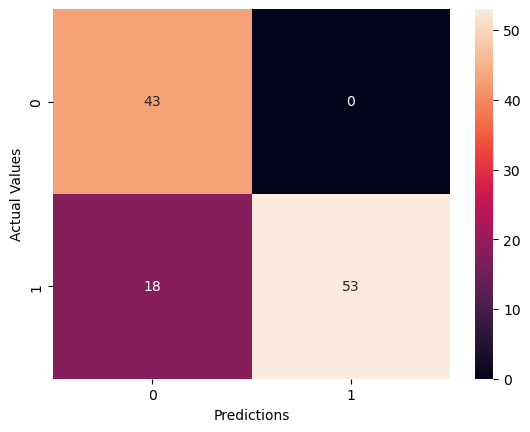

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate

# Predict
lr_pred = best_lr_model.predict(xtest_scaled)

# Classification report & confusion matrix
report = classification_report(ytest, lr_pred, digits=5)
matrix = confusion_matrix(ytest, lr_pred)

print("Classification Report: \n", report)
print("Confusion Matrix: \n", matrix)

# multiple metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(best_lr_model, xtrain_scaled, ytrain, cv=5, scoring=scoring)

for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()} scores: {scores}")
    print(f"Mean {metric}: {scores.mean()*100:.2f}%\n")

# Cross-Validate Models
cv_scores = cross_val_score(best_lr_model, xtrain_scaled, ytrain, scoring= 'f1', cv = 5)
mean_cv_score_percentage = cv_scores.mean() * 100
print(f'\nCross-Validation Scores: {cv_scores}')
print(f'Mean CV Score - lr Model: {mean_cv_score_percentage:.2f}%')
print("-" * 50)

# Heatmap
sns.heatmap(matrix, annot = True, fmt = 'g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.show()

### Random Forest Classifier

In [74]:
rf_model = RandomForestClassifier(random_state=42)

In [75]:
Classifiers[3][0]

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [76]:
RandomForestClassifier()

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],        
    'max_depth': [None, 10, 20, 30],        
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],          
    'max_features': ['sqrt', 'log2', None], 
    'bootstrap': [True, False]              
}

In [78]:
rf_gs = GridSearchCV(estimator= rf_model, param_grid = param_grid_rf, cv=5, verbose=2, n_jobs =-1, scoring ='f1')

In [79]:
rf_gs.fit(xtrain_scaled, ytrain)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [80]:
print('Best Parameters:', rf_gs.best_params_)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [81]:
print("Best cross-val score:", rf_gs.best_score_)

Best cross-val score: 0.9706076087655034


In [82]:
print("Test Set Score:", rf_gs.score(xtest_scaled, ytest))

Test Set Score: 0.916030534351145


In [83]:
best_rf_model = rf_gs.best_estimator_

#### Model Evaluation after Hyper Parameter tunning

Classification Report: 
               precision    recall  f1-score   support

           0    0.79630   1.00000   0.88660        43
           1    1.00000   0.84507   0.91603        71

    accuracy                        0.90351       114
   macro avg    0.89815   0.92254   0.90131       114
weighted avg    0.92316   0.90351   0.90493       114

Confusion Matrix: 
 [[43  0]
 [11 60]]
Accuracy scores: [0.98901099 0.94505495 0.97802198 0.95604396 0.94505495]
Mean accuracy: 96.26%

Precision scores: [0.98305085 0.93333333 1.         0.96491228 0.93333333]
Mean precision: 96.29%

Recall scores: [1.         0.98245614 0.96491228 0.96491228 0.98245614]
Mean recall: 97.89%

F1 scores: [0.99145299 0.95726496 0.98214286 0.96491228 0.95726496]
Mean f1: 97.06%


Cross-Validation F1 Scores: [0.99145299 0.95726496 0.98214286 0.96491228 0.95726496]
Mean CV Score - rf Model: 97.06%
--------------------------------------------------


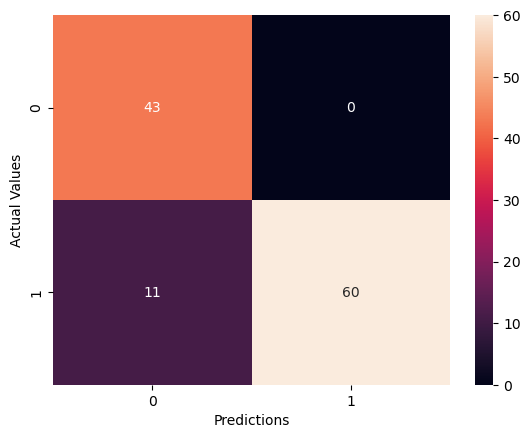

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate

# Predict
rf_pred = best_rf_model.predict(xtest_scaled)

# Classification report & confusion matrix
report = classification_report(ytest, rf_pred, digits=5)
matrix = confusion_matrix(ytest, rf_pred)

print("Classification Report: \n", report)
print("Confusion Matrix: \n", matrix)

# multiple metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(best_rf_model, xtrain_scaled, ytrain, cv=5, scoring=scoring)

for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()} scores: {scores}")
    print(f"Mean {metric}: {scores.mean()*100:.2f}%\n")

# Cross-Validate Models
cv_scores = cross_val_score(best_rf_model, xtrain_scaled, ytrain, cv = 5, scoring ='f1')
mean_cv_score_percentage = cv_scores.mean() * 100
print(f'\nCross-Validation F1 Scores: {cv_scores}')
print(f'Mean CV Score - rf Model: {mean_cv_score_percentage:.2f}%')
print("-" * 50)

# Heatmap
sns.heatmap(matrix, annot = True, fmt = 'g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.show()

### XGBClassifier

In [85]:
xgb_model = XGBClassifier(random_state=42)

In [86]:
Classifiers[4][0]

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [87]:
XGBClassifier()

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [88]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],        
    'max_depth': [3, 5, 7, 10],             
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],           
    'colsample_bytree': [0.6, 0.8, 1.0],   
    'gamma': [0, 1, 5],                     
    'reg_lambda': [1, 5, 10],               
    'reg_alpha': [0, 0.5, 1]                
}

In [89]:
xgb_gs = GridSearchCV(estimator= xgb_model, param_grid = param_grid_rf, cv=5, n_jobs =-1, verbose=2, scoring='f1')

In [90]:
xgb_gs.fit(xtrain_scaled, ytrain)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [91]:
print('Best Parameters:', xgb_gs.best_params_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [92]:
print("Best cross-val score:", xgb_gs.best_score_)

Best cross-val score: 0.9723517456157331


In [93]:
best_xgb_model = xgb_gs.best_estimator_

#### Model Evaluation after hyper parameter tuning

Classification Report: 
               precision    recall  f1-score   support

           0    0.79630   1.00000   0.88660        43
           1    1.00000   0.84507   0.91603        71

    accuracy                        0.90351       114
   macro avg    0.89815   0.92254   0.90131       114
weighted avg    0.92316   0.90351   0.90493       114

Confusion Matrix: 
 [[43  0]
 [11 60]]
Accuracy scores: [0.95604396 0.96703297 0.98901099 0.96703297 0.94505495]
Mean accuracy: 96.48%

Precision scores: [0.96551724 0.96551724 1.         0.96551724 0.93333333]
Mean precision: 96.60%

Recall scores: [0.96551724 0.98245614 0.98245614 0.98245614 0.98245614]
Mean recall: 97.91%

F1 scores: [0.96551724 0.97391304 0.99115044 0.97391304 0.95726496]
Mean f1: 97.24%


Cross-Validation Scores: [0.96551724 0.97391304 0.99115044 0.97391304 0.95726496]
Mean CV Score - xgb Model: 97.24%
--------------------------------------------------


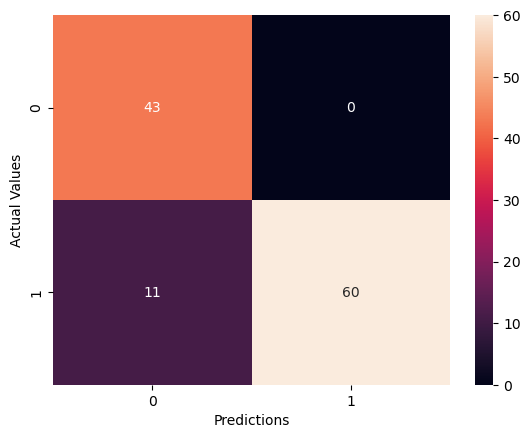

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate

# Predict
xgb_pred = best_xgb_model.predict(xtest_scaled)

# Classification report & confusion matrix
report = classification_report(ytest, xgb_pred, digits=5)
matrix = confusion_matrix(ytest, xgb_pred)

print("Classification Report: \n", report)
print("Confusion Matrix: \n", matrix)

# multiple metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(best_xgb_model, xtrain_scaled, ytrain, cv=5, scoring=scoring)

for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()} scores: {scores}")
    print(f"Mean {metric}: {scores.mean()*100:.2f}%\n")

# Cross-Validate Models
cv_scores = cross_val_score(best_xgb_model, xtrain_scaled, ytrain, cv = 5, scoring ='f1')
mean_cv_score_percentage = cv_scores.mean() * 100
print(f'\nCross-Validation Scores: {cv_scores}')
print(f'Mean CV Score - xgb Model: {mean_cv_score_percentage:.2f}%')
print("-" * 50)

# Heatmap
sns.heatmap(matrix, annot = True, fmt = 'g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.show()

### SVC Classifier

In [95]:
svc = SVC(random_state=42)

In [96]:
Classifiers[5][0]

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [97]:
SVC()

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [98]:
param_grid_svc = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
}   

In [99]:
svc_gs = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, n_jobs=-1, verbose=2, scoring='f1')    

In [100]:
svc_gs.fit(xtrain_scaled, ytrain)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


,estimator,SVC(random_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'degree': [2, 3, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'poly', ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [101]:
print('Best Parameters:', svc_gs.best_params_)

Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [102]:
print("Best cross-val score:", svc_gs.best_score_)

Best cross-val score: 0.9845846568241303


In [103]:
best_svc_model = svc_gs.best_estimator_

#### Model Evaluation after hyper parameter tuning

Classification Report: 
               precision    recall  f1-score   support

           0    0.69355   1.00000   0.81905        43
           1    1.00000   0.73239   0.84553        71

    accuracy                        0.83333       114
   macro avg    0.84677   0.86620   0.83229       114
weighted avg    0.88441   0.83333   0.83554       114

Confusion Matrix: 
 [[43  0]
 [19 52]]
Accuracy scores: [0.98901099 0.97802198 1.         0.97802198 0.95604396]
Mean accuracy: 98.02%

Precision scores: [1.         0.96610169 1.         0.96610169 0.93442623]
Mean precision: 97.33%

Recall scores: [0.98275862 1.         1.         1.         1.        ]
Mean recall: 99.66%

F1 scores: [0.99130435 0.98275862 1.         0.98275862 0.96610169]
Mean f1: 98.46%


Cross-Validation Scores: [0.99130435 0.98275862 1.         0.98275862 0.96610169]
Mean CV Score - svc Model: 98.46%
--------------------------------------------------


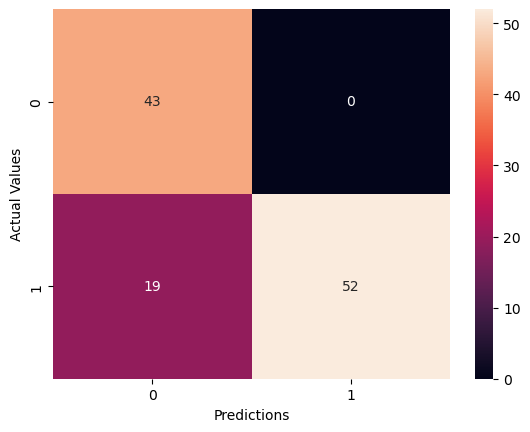

In [104]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate

# Predict
svc_pred = best_svc_model.predict(xtest_scaled)

# Classification report & confusion matrix
report = classification_report(ytest, svc_pred, digits=5)
matrix = confusion_matrix(ytest, svc_pred)

print("Classification Report: \n", report)
print("Confusion Matrix: \n", matrix)

# multiple metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(best_svc_model, xtrain_scaled, ytrain, cv=5, scoring=scoring)

for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()} scores: {scores}")
    print(f"Mean {metric}: {scores.mean()*100:.2f}%\n")

# Cross-Validate Models
cv_scores = cross_val_score(best_svc_model, xtrain_scaled, ytrain, scoring= 'f1', cv = 5)
mean_cv_score_percentage = cv_scores.mean() * 100
print(f'\nCross-Validation Scores: {cv_scores}')
print(f'Mean CV Score - svc Model: {mean_cv_score_percentage:.2f}%')
print("-" * 50)

# Heatmap
sns.heatmap(matrix, annot = True, fmt = 'g')
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.show()

#### Summary of all Model Performance before and after optimization

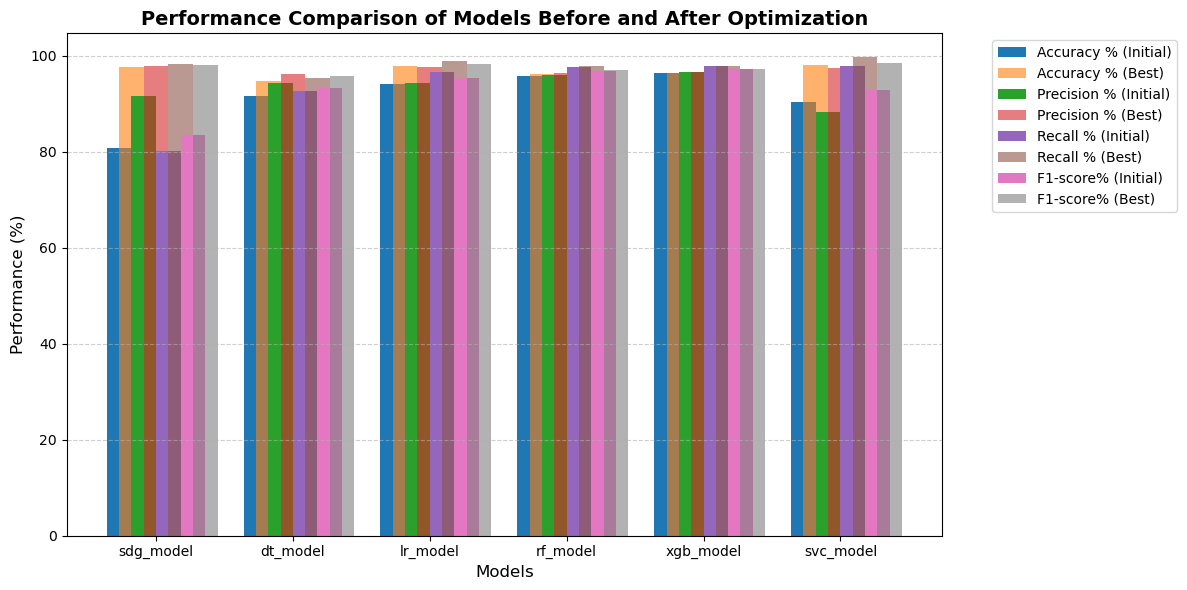

In [105]:
Models = {
    'Model Name': ['sdg_model', 'dt_model', 'lr_model', 'rf_model', 'xgb_model', 'svc_model'],
    'Accuracy %': [80.66, 91.65, 94.07, 95.82, 96.48, 90.33],
    'Precision %': [91.63, 94.23, 94.21, 95.94, 96.60, 88.27],
    'Recall %': [80.08, 92.66, 96.50, 97.54, 97.91, 97.90],
    'F1-score%': [83.38, 93.32, 95.33, 96.71, 97.24, 92.78],
    'Best Model Name': ['best_sdg_model', 'best_dt_model', 'best_lr_model', 'best_rf_model', 'best_xgb_model', 'best_svc_model'],
    'Accuracy1 %': [97.58, 94.73, 97.80, 96.26, 96.48, 98.02],
    'Precision1 %': [97.92, 96.20, 97.62, 96.28, 96.60, 97.33],
    'Recall1 %': [98.25, 95.44, 98.95, 97.89, 97.91, 99.66],
    'F1-score1%': [98.08, 95.80, 98.27, 97.06, 97.24, 98.46]
}

# Create a DataFrame
df = pd.DataFrame(Models)

# Set figure size
plt.figure(figsize=(12, 6))

# Define metrics to plot
metrics = ['Accuracy %', 'Precision %', 'Recall %', 'F1-score%']
best_metrics = ['Accuracy1 %', 'Precision1 %', 'Recall1 %', 'F1-score1%']
x = np.arange(len(df['Model Name']))  # model positions
width = 0.18  # bar width

# Plot bars for each metric
for i, (metric, best_metric) in enumerate(zip(metrics, best_metrics)):
    plt.bar(x + i * width, df[metric], width=width, label=metric + ' (Initial)')
    plt.bar(x + i * width + width/2, df[best_metric], width=width, label=metric + ' (Best)', alpha=0.6)

# Customize the plot
plt.xticks(x + width * 1.5, df['Model Name'])
plt.xlabel('Models', fontsize=12)
plt.ylabel('Performance (%)', fontsize=12)
plt.title('Performance Comparison of Models Before and After Optimization', fontsize=14, weight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

In [106]:
df = pd.DataFrame(Models)
df

,Model Name,Accuracy %,Precision %,Recall %,F1-score%,Best Model Name,Accuracy1 %,Precision1 %,Recall1 %,F1-score1%
0,sdg_model,80.66,91.63,80.08,83.38,best_sdg_model,97.58,97.92,98.25,98.08
1,dt_model,91.65,94.23,92.66,93.32,best_dt_model,94.73,96.20,95.44,95.80
2,lr_model,94.07,94.21,96.50,95.33,best_lr_model,97.80,97.62,98.95,98.27
3,rf_model,95.82,95.94,97.54,96.71,best_rf_model,96.26,96.28,97.89,97.06
4,xgb_model,96.48,96.60,97.91,97.24,best_xgb_model,96.48,96.60,97.91,97.24
5,svc_model,90.33,88.27,97.90,92.78,best_svc_model,98.02,97.33,99.66,98.46


#### Observation
##### After hyper parameter tuning, best_svc_model had the highest recall (99.66%) and F1-score (98.46%), along with strong precision (97.33%) and highest accuracy (98.02%). The model correctly identified cancer cells with less false negatives. 

### Feature Importance for SVC Model

In [107]:
import shap

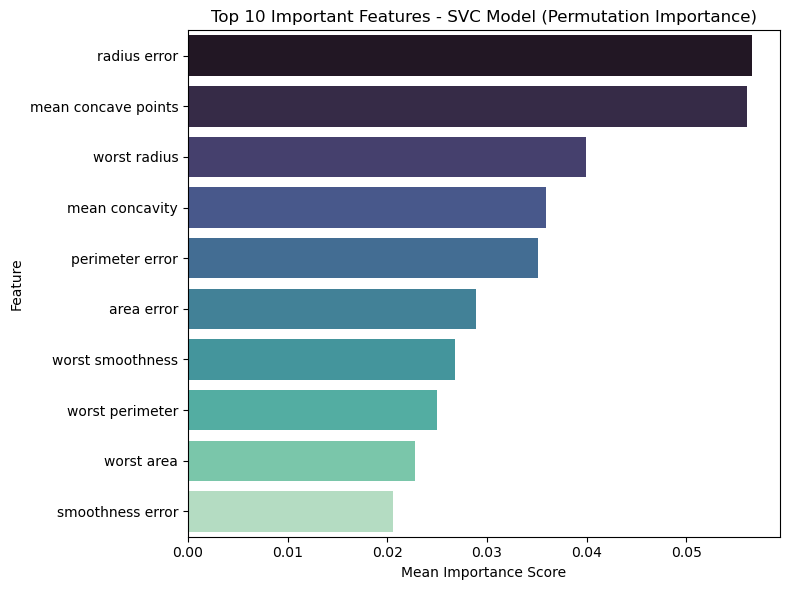

In [113]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(best_svc_model, xtest_scaled, ytest, n_repeats=20, random_state=42)

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': xtest.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(8, 6))
sns.barplot(x=importance_df.Importance[:10], y=importance_df.Feature[:10], palette="mako")
plt.title("Top 10 Important Features - SVC Model (Permutation Importance)")
plt.xlabel("Mean Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Observation

•	The bar chart ranks features according to their mean importance scores, representing how much each feature contributes to the model’s predictive accuracy. The longer the bar, the greater the impact of that feature on the model’s decision-making. The most influential features include radius error, mean concave points and worst radius. 

### Model Interpretability

  0%|          | 0/100 [00:02<?, ?it/s]

<function matplotlib.pyplot.show(close=None, block=None)>

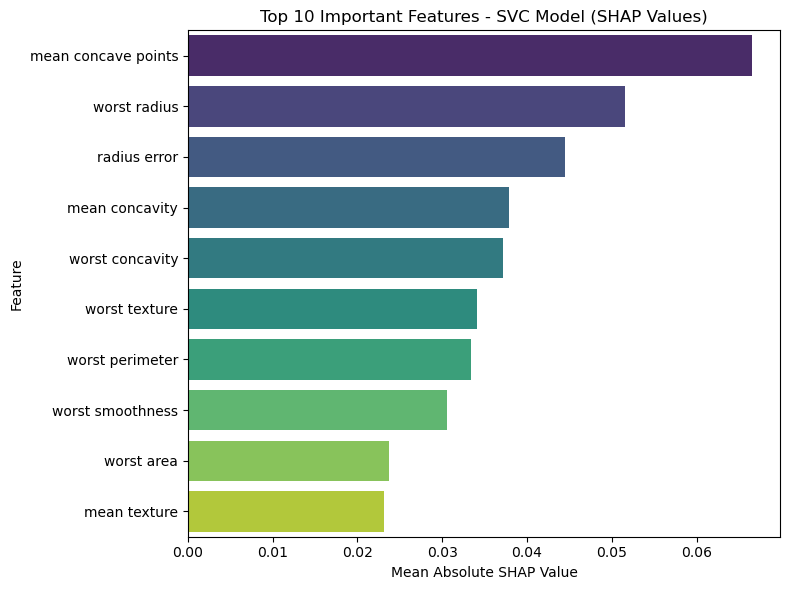

In [121]:
# Sample a smaller subset of training data to speed up SHAP (optional)
background = shap.sample(xtrain_scaled, 100, random_state=42)

# Create SHAP KernelExplainer
explainer = shap.KernelExplainer(best_svc_model.predict, background)

# Compute SHAP values on a small subset of test data (to reduce runtime)
sample_data = shap.sample(xtest_scaled, 100, random_state=42)
shap_values = explainer.shap_values(sample_data)

# Convert SHAP values to DataFrame for plotting feature importance
shap_abs_mean = np.abs(shap_values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature': xtest.columns,
    'Mean_SHAP_Value': shap_abs_mean
}).sort_values(by='Mean_SHAP_Value', ascending=False)

# Plot Top 10 Important Features
plt.figure(figsize=(8, 6))
sns.barplot(x='Mean_SHAP_Value', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title("Top 10 Important Features - SVC Model (SHAP Values)")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show

### Observation

•	The Support Vector Classifier (SVC) model demonstrated strong predictive performance in distinguishing between malignant and benign breast cancer cases. To enhance interpretability and understand the decision-making process of the model, SHapley Additive exPlanations (SHAP) analysis was conducted. The SHAP feature importance plot ranked features according to their mean absolute SHAP values, indicating their overall influence on model predictions.

•	The results revealed that mean concave points, worst radius, and radius error were the most influential features in predicting malignancy. These attributes exhibited the highest SHAP values, indicating that tumours with greater concavity and larger radii are more likely to be classified as malignant. Other significant features included mean concavity, worst concavity, and worst texture, reflecting the importance of both geometric and textural irregularities in identifying malignant growths. Overall, the model demonstrated an interpretable feature importance pattern, aligning with known diagnostic markers in breast cancer histopathology.

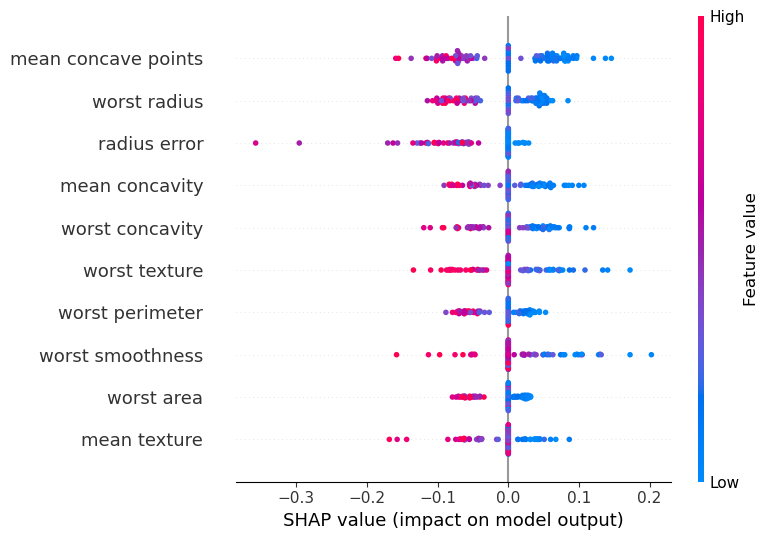

In [126]:
# SHAP Summary Plot
shap.summary_plot(shap_values, sample_data, feature_names=xtest.columns, max_display=10)

### Observation

•	The SHAP (SHapley Additive exPlanations) summary plot illustrates the relative importance and directional impact of the top ten predictive features in the Support Vector Classifier (SVC) model used for breast cancer classification. The features are ordered by their mean absolute SHAP values, indicating their average contribution to the model’s predictions. The SHAP summary plot provided deeper insight into the direction and magnitude of each feature’s impact on model output

•	The results reveal that mean concave points, worst radius, and radius error exert the most significant influence on the model’s output, followed closely by mean concavity and worst concavity. This finding suggests that shape irregularities and size-related metrics are critical indicators distinguishing malignant from benign breast tumours.

•	The x-axis of the SHAP summary plot represents the SHAP value, which reflects each feature’s impact on the model’s prediction. Positive SHAP values indicate a tendency toward malignant classification, while negative values indicate a benign classification. Each point on the plot corresponds to a single observation, with colour intensity representing the magnitude of the feature value (red denoting high values and blue denoting low values).

•	High feature values for mean concave points and worst radius (depicted in red) are predominantly associated with positive SHAP values, indicating that larger and more irregular tumour shapes increase the likelihood of malignancy. Conversely, low feature values (blue) correspond to negative SHAP values, suggesting benign tumour characteristics. Similar patterns are observed for mean concavity and worst concavity, where higher values are indicative of malignant cases. Texture-related features such as worst texture and mean texture show smaller, yet meaningful contributions, demonstrating that variations in tissue texture provide additional, though secondary, diagnostic cues.

•	Overall, the SHAP analysis validated that the SVC model’s predictions were driven by medically relevant factors, demonstrating both predictive accuracy and interpretability. By linking computational results with clinical reasoning, SHAP provides a transparent foundation for integrating machine learning models into diagnostic workflows. This interpretability is essential for clinical decision support systems, where understanding why a model makes a prediction is as important as the prediction itself.